In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing dataset and viewing samples

In [11]:
df=pd.read_csv('sales_data..csv')
df.head()

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
0,2024-11-01,S003,P002,172.0,971.90,11.42,Premium
1,2024-11-02,S016,P006,140.0,750.59,10.42,Regular
2,2024-11-03,S015,P003,91.0,533.52,9.01,New
3,2024-11-04,S007,P008,132.0,NaN,9.57,New
4,2024-11-05,S007,P007,51.0,640.36,8.90,New


**Analysing dataset checking how many missing values are there**

In [31]:
print("Data Types:\n", df.dtypes)
df.isnull().sum()

Data Types:
 Date                 object
Store ID             object
Product ID           object
Units Sold          float64
Sales Amount        float64
Discount Applied    float64
Customer Segment     object
dtype: object


Date                0
Store ID            0
Product ID          0
Units Sold          0
Sales Amount        0
Discount Applied    0
Customer Segment    0
dtype: int64

In [13]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        Units Sold  Sales Amount  Discount Applied
count  190.000000    190.000000        200.000000
mean   101.631579    555.098895          8.333600
std     56.645571    257.754524          4.338069
min     11.000000    101.210000          0.120000
25%     51.500000    309.765000          4.255000
50%    102.500000    570.385000          8.600000
75%    152.750000    781.250000         12.190000
max    200.000000    988.000000         14.950000


**Handle Missing Values:**
    Fill missing values in "Units Sold" and "Sales Amount."

Units Sold: Fill with the median (as it’s less sensitive to outliers).  
Sales Amount: Fill with median for missing values.

In [14]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())
df['Sales Amount'] = df['Sales Amount'].fillna(df['Sales Amount'].median())

**Format Corrections:** Ensure "Date" is in datetime format and 
changing format from yyyy-mm-dd to dd-mm-yyyy

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d %m %Y')
df.head()

ValueError: time data "13 11 2024" doesn't match format "%m %d %Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [16]:
for col in ['Sales Amount', 'Discount Applied']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

**Aggregate** by Date, Store, and Product: Sum "Sales Amount" and "Units Sold" for each level.

In [17]:
daily_sales = df.groupby('Date')[['Sales Amount', 'Units Sold']].sum().reset_index()
print("Daily Sales:")
print(daily_sales.head()) 

Daily Sales:
         Date  Sales Amount  Units Sold
0  01 01 2025       570.385        51.0
1  01 02 2025       843.340       146.0
2  01 03 2025       717.910        13.0
3  01 04 2025       109.530       102.5
4  01 05 2025       776.540       181.0


In [18]:
store_sales = df.groupby('Store ID')[['Sales Amount', 'Units Sold']].sum().reset_index()
print("Store Sales:")
print(store_sales.head())

Store Sales:
  Store ID  Sales Amount  Units Sold
0     S001      5842.635      1007.5
1     S002      3561.040       580.0
2     S003      7680.605      1221.0
3     S004      5283.325       773.0
4     S005      7160.480      1258.0


In [19]:
product_sales = df.groupby('Product ID')[['Sales Amount', 'Units Sold']].sum().reset_index()
print("Product Sales:")
print(product_sales.head())

Product Sales:
  Product ID  Sales Amount  Units Sold
0       P001      6578.035      1534.5
1       P002      6367.590      1580.0
2       P003      9871.145      1723.0
3       P004      5971.450      1378.0
4       P005      6702.745      1204.0


**Total and Average Sales per Product:** Calculate the total and average sales per product.

In [20]:
product_summary = df.groupby('Product ID')['Sales Amount'].agg(['sum', 'mean']).rename(columns={'sum': 'Total Sales', 'mean': 'Average Sales'}).reset_index()
print("Product Sales Summary:")
print(product_summary)

Product Sales Summary:
   Product ID  Total Sales  Average Sales
0        P001     6578.035     598.003182
1        P002     6367.590     530.632500
2        P003     9871.145     493.557250
3        P004     5971.450     497.620833
4        P005     6702.745     515.595769
5        P006     8284.475     690.372917
6        P007     8944.960     596.330667
7        P008     5046.175     420.514583
8        P009     4574.450     508.272222
9        P010    10066.425     719.030357
10       P011     8117.130     579.795000
11       P012     8782.470     462.235263
12       P013     6424.710     535.392500
13       P014    10122.195     723.013929
14       P015     5318.685     483.516818


**Store with Highest Sales:** Identify the store with the highest total sales.

In [21]:
top_store = store_sales.loc[store_sales['Sales Amount'].idxmax()]
print("Store with highest sales:")
print(top_store)

Store with highest sales:
Store ID           S017
Sales Amount    10210.3
Units Sold       2148.0
Name: 16, dtype: object


**Impact of Discounts on Sales:** Analyze correlation between "Discount Applied" and "Sales Amount."

In [22]:
discount_sales_corr = df[['Discount Applied', 'Sales Amount']].corr().iloc[0, 1]
print("Correlation between Discount and Sales Amount:", discount_sales_corr)

Correlation between Discount and Sales Amount: -0.00038664028768440326


**Sales Trend Over Time:** Identifies patterns or seasonal changes.

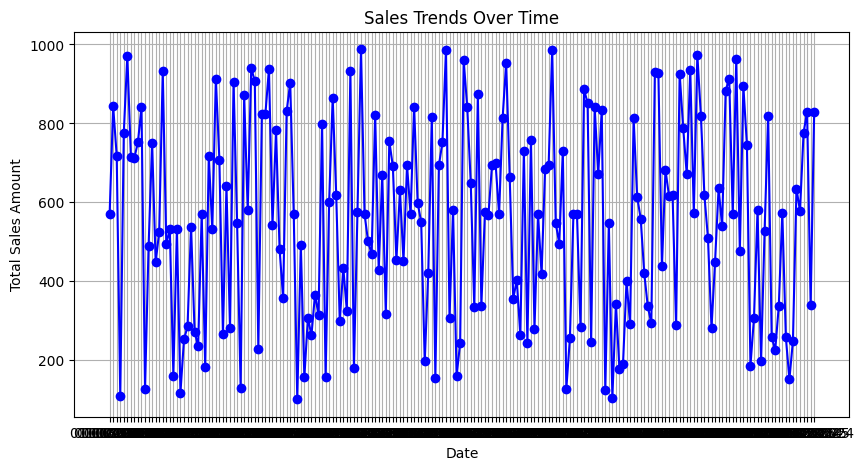

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Sales Amount'], marker='o', color='b')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid()
plt.show()

**Units Sold Trend Over Time:** Tracks unit sales trends.

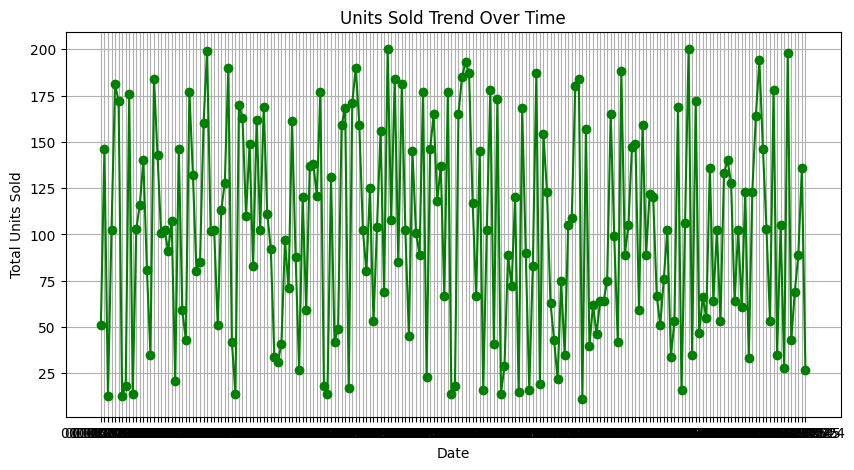

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'], marker='o', color='green')
plt.title("Units Sold Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Units Sold")
plt.grid()
plt.show()

**Sales Distribution Across Stores:** Shows which stores perform better.

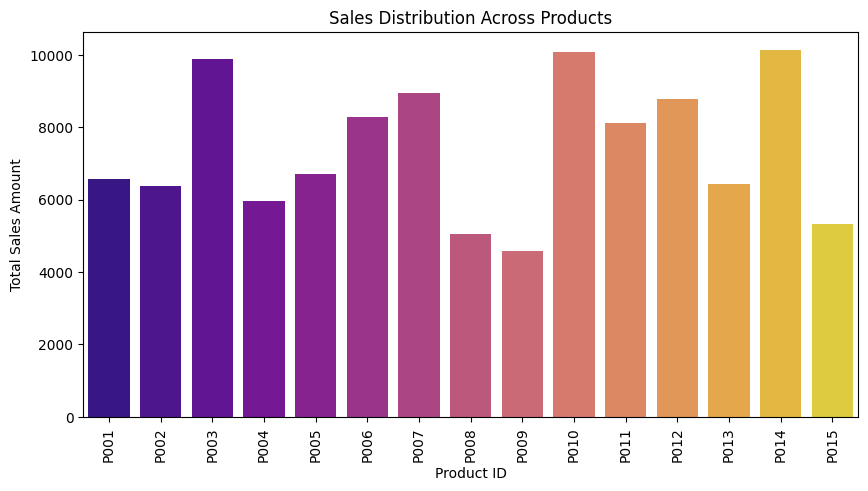

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales, x='Product ID', y='Sales Amount', palette='plasma')
plt.title("Sales Distribution Across Products")
plt.xlabel("Product ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=90)
plt.show()

**Customer Segment Analysis:** Shows sales variation by customer segmen

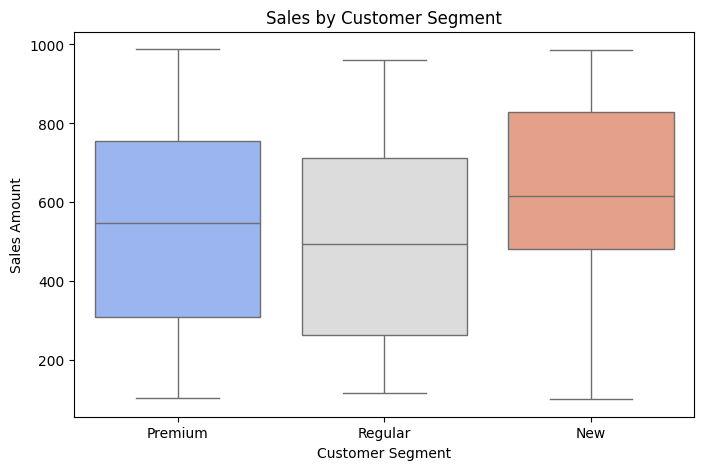

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Customer Segment', y='Sales Amount', palette='coolwarm')
plt.title("Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Sales Amount")
plt.show()

**Performance Comparison of Products:** Compares total and average sales per product.

<Figure size 1200x600 with 0 Axes>

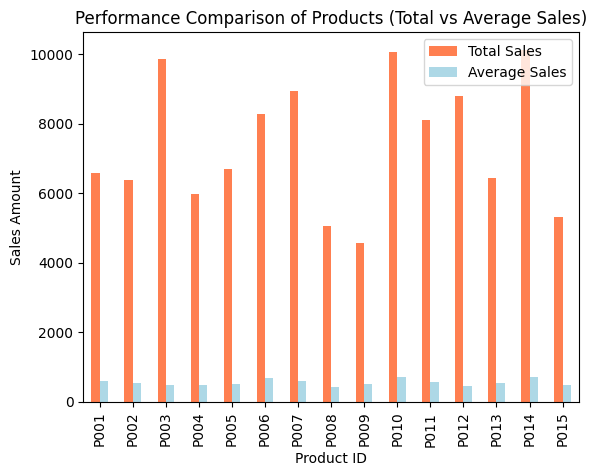

In [27]:
plt.figure(figsize=(12, 6))
product_summary.set_index('Product ID')[['Total Sales', 'Average Sales']].plot(kind='bar', color=['coral', 'lightblue'])
plt.title("Performance Comparison of Products (Total vs Average Sales)")
plt.xlabel("Product ID")
plt.ylabel("Sales Amount")
plt.xticks(rotation=90)
plt.show()

**Correlation Heatmap:** Highlights relationships among "Units Sold," "Sales Amount," and "Discount Applied."

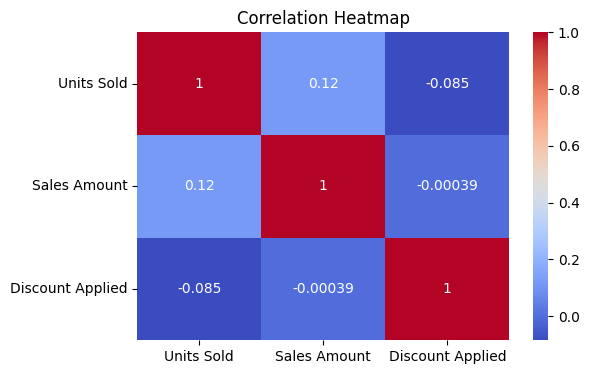

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Units Sold', 'Sales Amount', 'Discount Applied']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Sales Amount Distribution:**overview of typical sales values

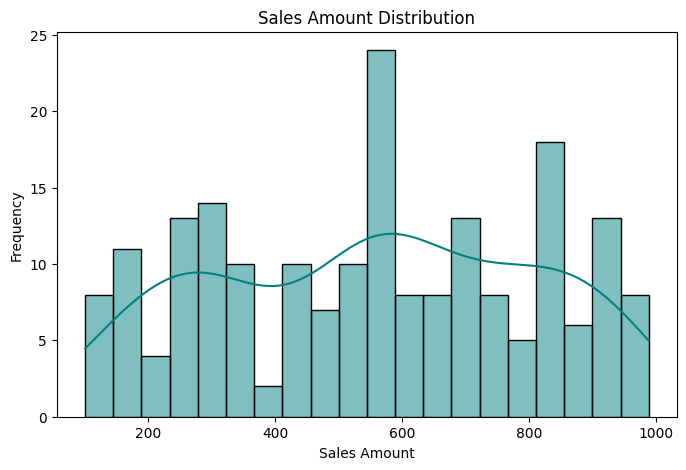

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales Amount'], kde=True, color='teal', bins=20)
plt.title("Sales Amount Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

**Discount Impact on Sales:** Visualizes if higher discounts increase sales.

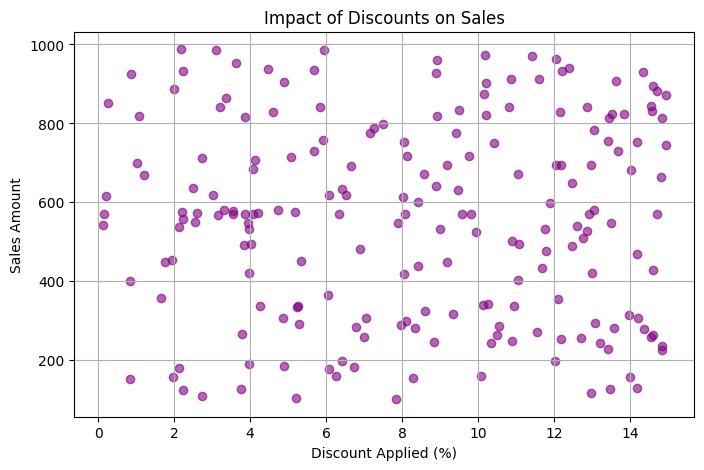

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Discount Applied'], df['Sales Amount'], color='purple', alpha=0.6)
plt.title("Impact of Discounts on Sales")
plt.xlabel("Discount Applied (%)")
plt.ylabel("Sales Amount")
plt.grid()
plt.show()